# Modelos lineales y regularizacion

In [3]:
import numpy as np

n=100
X = 2 * np.random.rand(n, 1)
y = 4 + 3 * X + np.random.randn(n, 1)

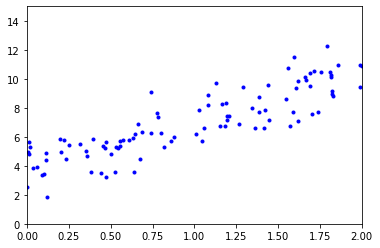

In [4]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
X_b = np.c_[np.ones((n, 1)), X] # add x0 = 1 to each instance
# w_hat 
w_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
X_b.shape

(100, 2)

In [7]:
print(w_hat)

[[3.7651242 ]
 [3.28906726]]


In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(w_hat)

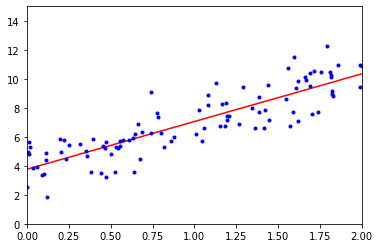

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)
print('Coeficientes Manual : ',w_hat)

Coeficientes Sklearn :  [3.7651242] [[3.28906726]]
Coeficientes Manual :  [[3.7651242 ]
 [3.28906726]]


# Regularizacion

In [24]:
X = np.linspace(0,np.pi,1000)
f = 1/4

y = np.sin(2*np.pi*f*X) + np.random.normal(scale=0.1, size=len(X))

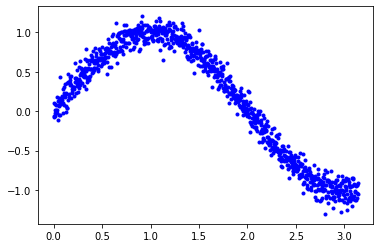

In [29]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.show()

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)

Coeficientes Sklearn :  1.1477036681650996 [-0.62829289]


In [37]:
X_new=np.random.uniform(0,3,100)
y_predict=lin_reg.predict(X_new.reshape(-1,1))

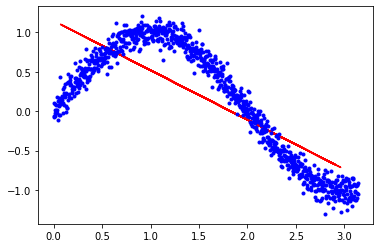

In [38]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,interaction_only=False,include_bias=True)
poly.fit(X.reshape(-1,1))
X_p=poly.transform(X.reshape(-1,1))

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1,1), y)
r2=lin_reg.score(X.reshape(-1,1), y)
print('Coeficiente Determinacion :',r2)

Coeficiente Determinacion : 0.6322691657597039


In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
print('Coeficiente Determinacion :',r2)

Coeficiente Determinacion : 0.8917622956034688


In [46]:
y_predict=lin_reg.predict(X_p)

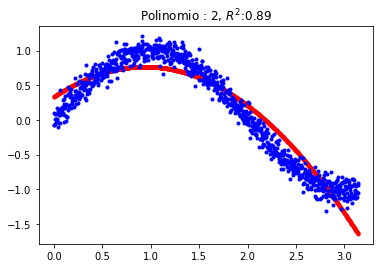

In [48]:
plt.plot(X_p[:,1], y_predict, "r.")
plt.plot(X,y,'b.')
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(2,r2))
plt.show()

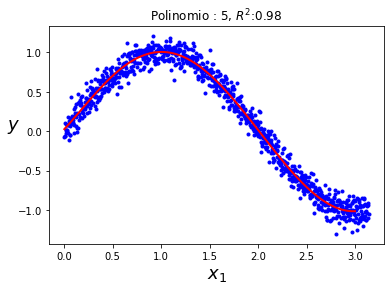

In [51]:
K=5
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X.reshape(-1,1))
X_p=poly.transform(X.reshape(-1,1))
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(0, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

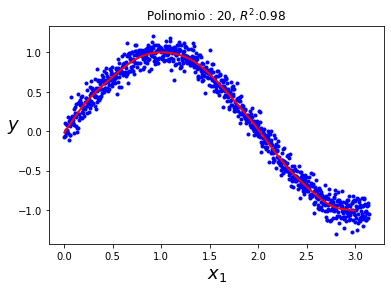

In [57]:
K=20
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X.reshape(-1,1))
X_p=poly.transform(X.reshape(-1,1))
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(0, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

In [58]:
print(X_p.shape)

(1000, 21)


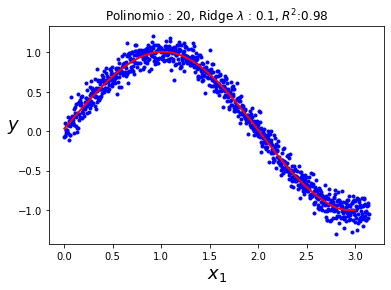

In [60]:
from sklearn.linear_model import Ridge

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X.reshape(-1,1))
X_p=poly.transform(X.reshape(-1,1))

ridge_reg = Ridge(alpha=lamb, solver="cholesky", random_state=42)
ridge_reg.fit(X_p, y)
r2=ridge_reg.score(X_p, y)

X_new=np.linspace(0, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = ridge_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title(r'Polinomio : {0}, Ridge $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

In [66]:
ridge_reg.coef_

array([ 0.00000000e+00,  1.43297962e+00, -1.96229637e-02, -2.81282819e-01,
       -1.92754465e-01, -5.34362387e-02,  4.03632236e-02,  6.32984237e-02,
        2.93692677e-02, -2.05203531e-02, -4.04266641e-02, -1.29135452e-02,
        2.84627002e-02,  2.59697457e-02, -2.13470958e-02, -2.44206521e-02,
        3.54169678e-02, -1.84390377e-02,  4.97630504e-03, -6.98503334e-04,
        4.05209656e-05])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.007e+01, tolerance: 5.145e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


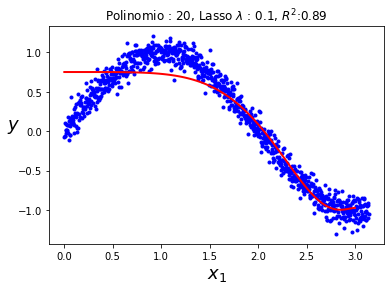

In [62]:
from sklearn.linear_model import Lasso

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X.reshape(-1,1))
X_p=poly.transform(X.reshape(-1,1))

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_p, y)
r2=lasso_reg.score(X_p, y)

X_new=np.linspace(0, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lasso_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title(r'Polinomio : {0}, Lasso $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

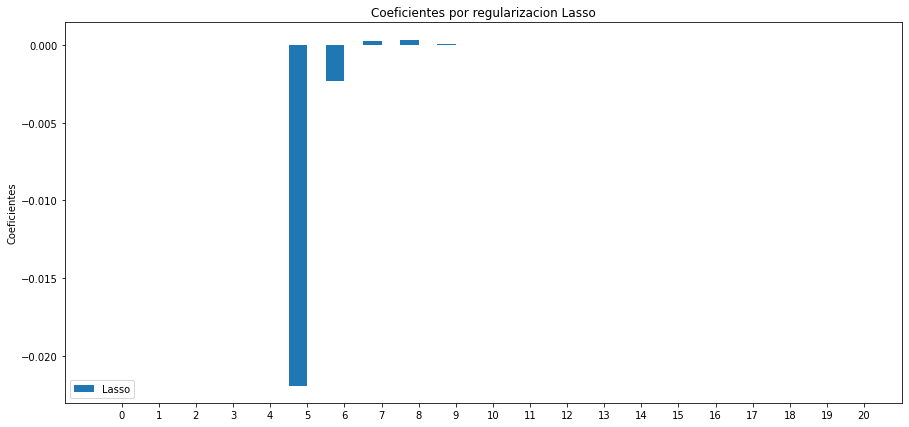

In [72]:
x = np.arange(len(lasso_reg.coef_))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, lasso_reg.coef_, width, label='Lasso')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes por regularizacion Lasso')
ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.legend()

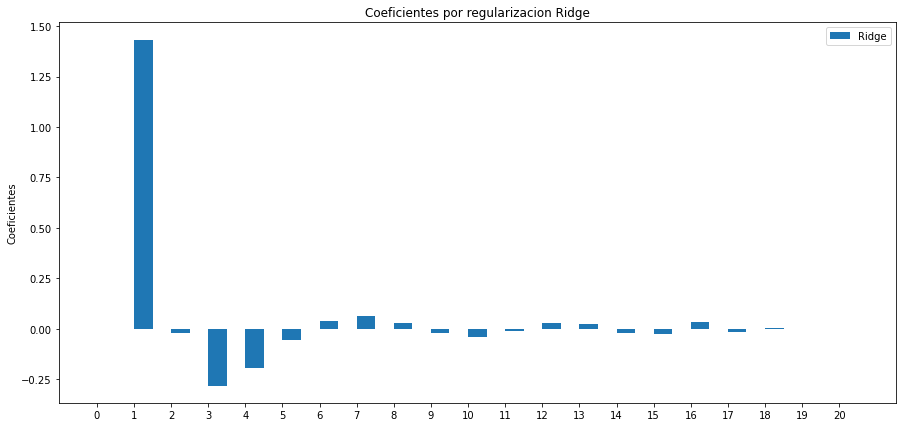

In [71]:
x = np.arange(len(ridge_reg.coef_))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots(figsize=(15,7))
rects2 = ax.bar(x + width/2, ridge_reg.coef_, width, label='Ridge')
#rects3 = ax.bar(x + width/2, lin_reg.coef_[0], width, label='Linear')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes por regularizacion Ridge')
ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.legend()

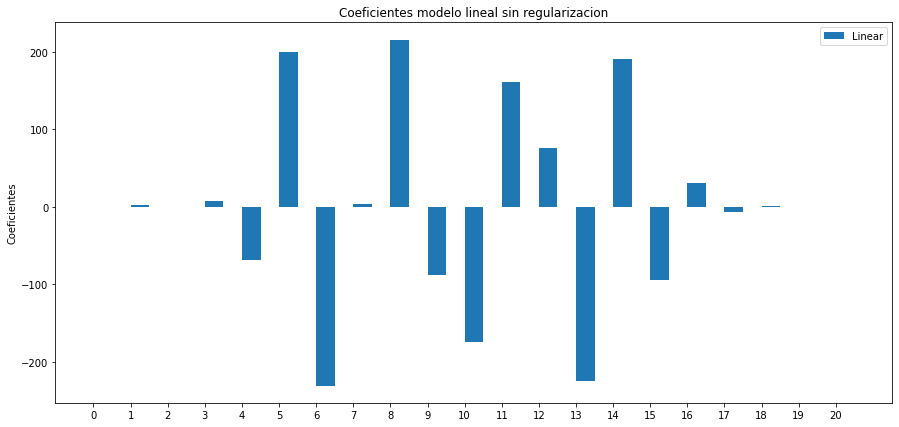

In [74]:
x = np.arange(len(ridge_reg.coef_))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots(figsize=(15,7))
rects3 = ax.bar(x + width/2, lin_reg.coef_, width, label='Linear')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes modelo lineal sin regularizacion')
ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.legend()

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir el total de 'nuevos casos' a partir de las distintas vacunas y las medidas administradas en Chile.
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo regularizacion.


In [ ]:
import pandas as pd

data_cases = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv",
    keep_default_na=False,
    na_values=[""],
)

In [ ]:
for i,c in enumerate(data_cases.columns):
  print(i,c)

0 date
1 location_key
2 new_confirmed
3 new_deceased
4 new_recovered
5 new_tested
6 cumulative_confirmed
7 cumulative_deceased
8 cumulative_recovered
9 cumulative_tested


In [ ]:
cases_bolivia=data_cases[data_cases.location_key=='BO']

In [ ]:
cases_bolivia.shape

(658, 10)

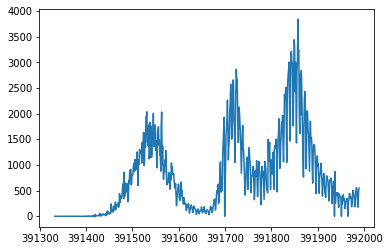

In [ ]:
cases_bolivia['new_confirmed'].plot()

In [ ]:
data_vaccines = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/vaccinations.csv",
    keep_default_na=False,
    na_values=[""],
)

In [ ]:
data_vaccines[data_vaccines.location_key=='BO'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
new_persons_vaccinated,206.0,2.757431e+04,1.611223e+05,-1106411.0,2280.75,8035.0,24904.00,1431134.0
cumulative_persons_vaccinated,207.0,1.465363e+06,1.384446e+06,0.0,163820.50,1004613.0,2948535.50,4252426.0
new_persons_fully_vaccinated,206.0,2.222231e+04,9.475739e+04,-489210.0,679.75,6610.5,29334.00,762181.0
cumulative_persons_fully_vaccinated,207.0,8.898139e+05,1.060779e+06,0.0,64369.00,296588.0,1823049.00,3258388.0
new_vaccine_doses_administered,153.0,4.530516e+04,7.078258e+04,12.0,6996.00,23085.0,52392.00,501685.0
cumulative_vaccine_doses_administered,154.0,2.021552e+06,2.132955e+06,0.0,318602.50,1044046.0,3493784.75,6931689.0
new_persons_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cumulative_persons_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_persons_fully_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cumulative_persons_fully_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vaccines_bolivia=data_vaccines[data_vaccines.location_key=='BO']

In [ ]:
data_response = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/oxford-government-response.csv",
    keep_default_na=False,
    na_values=[""],
)

In [ ]:
data_response[data_response.location_key=='BO'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school_closing,651.0,2.282642e+00,9.265269e-01,0.0,2.00,3.00,3.0,3.0
workplace_closing,651.0,1.182796e+00,1.124036e+00,0.0,0.00,1.00,2.0,3.0
cancel_public_events,651.0,1.006144e+00,8.978396e-01,0.0,0.00,1.00,2.0,2.0
restrictions_on_gatherings,651.0,1.740399e+00,1.868413e+00,0.0,0.00,1.00,4.0,4.0
public_transport_closing,651.0,9.400922e-01,9.254218e-01,0.0,0.00,1.00,2.0,2.0
stay_at_home_requirements,642.0,1.216511e+00,9.585033e-01,0.0,0.00,2.00,2.0,3.0
restrictions_on_internal_movement,651.0,9.554531e-01,9.095292e-01,0.0,0.00,1.00,2.0,2.0
international_travel_controls,651.0,2.516129e+00,1.519403e+00,0.0,1.00,3.00,4.0,4.0
income_support,643.0,8.491446e-01,3.581865e-01,0.0,1.00,1.00,1.0,1.0
debt_relief,651.0,8.632873e-01,8.689805e-01,0.0,0.00,1.00,2.0,2.0


In [ ]:
response_bolivia=data_response.loc[data_response.location_key=='BO']

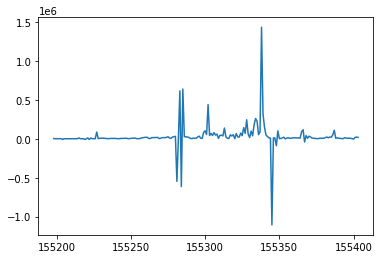

In [ ]:
vaccines_bolivia['new_persons_vaccinated'].plot()

In [ ]:
remove_outliers=vaccines_bolivia['new_persons_vaccinated'].between(0, vaccines_bolivia['new_persons_vaccinated'].quantile(.95))

In [ ]:
vaccines_bolivia=vaccines_bolivia[remove_outliers]

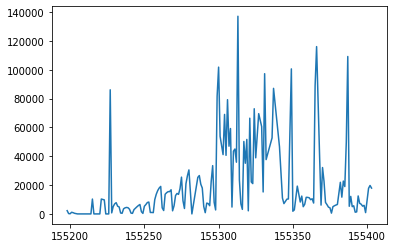

In [ ]:
vaccines_bolivia['new_persons_vaccinated'].plot()

In [ ]:
cases_bolivia.set_index('date',inplace=True)
vaccines_bolivia.set_index('date',inplace=True)
response_bolivia.set_index('date',inplace=True)

In [ ]:
df_bolivia=pd.merge(cases_bolivia,vaccines_bolivia, left_index=True, right_index=True)

In [ ]:
df_bolivia=pd.merge(df_bolivia,response_bolivia, left_index=True, right_index=True)

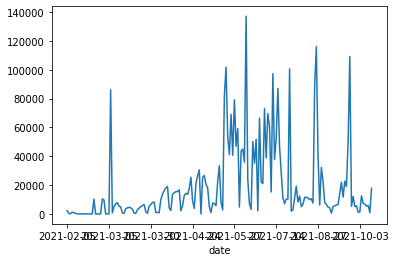

In [ ]:
df_bolivia['new_persons_vaccinated'].plot()

In [ ]:
y=df_bolivia['new_confirmed']
X=df_bolivia[['new_persons_vaccinated','school_closing','workplace_closing','cancel_public_events','facial_coverings']]